DengAI - Modelos de Classificaao KNN e SVM


In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import  pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')
import time as time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Ler Arquivo CSV com dados Climáticos 

In [66]:
file='./Sobral_Diarios_Inmet.csv'
data = pd.read_csv(file,sep=',')
file='./Sobral_Diarios_Infectados.csv'
data2 = pd.read_csv(file,sep=',')


## Verificar dados faltando no dataset Inmet

In [67]:
tot_nulos=data.isnull().sum()
tot_nulos

Data               0
Hora               0
Precipitacao    4740
TempMaxima      4746
TempMinima      4717
Insolacao       4756
Evaporacao      4956
TempMedia       4750
Umidade         4768
VelVento        4763
Semana             0
Ano                0
dtype: int64

## Substituir valores NAN por o valor da linha de baixo para a coluna Precipitação

In [68]:
data["Precipitacao"].fillna( method ='backfill', limit = 1, inplace = True) 
data["TempMinima"].fillna( method ='backfill', limit = 1, inplace = True) 
data["TempMaxima"].fillna( method ='backfill', limit = 1, inplace = True) 
data["Insolacao"].fillna( method ='backfill', limit = 1, inplace = True) 
data["Evaporacao"].fillna( method ='backfill', limit = 1, inplace = True) 
data["TempMedia"].fillna( method ='backfill', limit = 1, inplace = True) 
data["Umidade"].fillna( method ='backfill', limit = 1, inplace = True) 
data["VelVento"].fillna( method ='backfill', limit = 1, inplace = True) 


## Substituir valores NAN por o valor da linha de baixo para a coluna TempMinima

In [69]:
Indices=[x for x in data.index if x%2==1]
data.drop(Indices, inplace=True)
data

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento,Semana,Ano
0,01/01/2007,0,9.8,35.0,23.4,7.3,4.0,27.68,73.00,2.367027,1,2007
2,02/01/2007,0,8.0,35.5,23.2,7.0,3.8,27.92,70.75,2.500000,1,2007
4,03/01/2007,0,0.7,35.5,23.1,5.5,5.7,27.74,69.00,2.433333,1,2007
6,04/01/2007,0,1.9,36.5,24.7,8.4,6.0,28.28,63.50,2.000000,1,2007
8,05/01/2007,0,0.0,35.3,20.0,9.1,7.8,28.00,59.25,2.500000,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
9470,24/12/2019,0,0.0,35.5,25.6,5.8,NaN,29.60,69.00,1.028880,52,2019
9472,25/12/2019,0,0.0,38.3,23.8,9.3,NaN,29.54,64.00,1.800540,52,2019
9474,26/12/2019,0,0.0,37.8,23.1,9.7,NaN,29.64,59.00,2.572200,52,2019
9476,27/12/2019,0,0.0,37.5,23.8,9.1,NaN,29.40,64.00,2.057760,52,2019


## Reindexa os Indices para que a concatenação posterior seja possível

In [70]:
data.reset_index(inplace = True, drop = True)

data


,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento,Semana,Ano
0,01/01/2007,0,9.8,35.0,23.4,7.3,4.0,27.68,73.00,2.367027,1,2007
1,02/01/2007,0,8.0,35.5,23.2,7.0,3.8,27.92,70.75,2.500000,1,2007
2,03/01/2007,0,0.7,35.5,23.1,5.5,5.7,27.74,69.00,2.433333,1,2007
3,04/01/2007,0,1.9,36.5,24.7,8.4,6.0,28.28,63.50,2.000000,1,2007
4,05/01/2007,0,0.0,35.3,20.0,9.1,7.8,28.00,59.25,2.500000,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
4735,24/12/2019,0,0.0,35.5,25.6,5.8,NaN,29.60,69.00,1.028880,52,2019
4736,25/12/2019,0,0.0,38.3,23.8,9.3,NaN,29.54,64.00,1.800540,52,2019
4737,26/12/2019,0,0.0,37.8,23.1,9.7,NaN,29.64,59.00,2.572200,52,2019
4738,27/12/2019,0,0.0,37.5,23.8,9.1,NaN,29.40,64.00,2.057760,52,2019


## Agrupando dados Inmet Semanais

In [71]:
dataSemana = data.groupby(by=['Ano','Semana'], as_index=False)['Precipitacao','TempMaxima','TempMinima','Insolacao','Evaporacao','TempMedia',	'Umidade',	'VelVento'].sum()
#dataSemana.to_csv('./Inme_Semanal.csv')


## Excluindo ano de 2007

In [72]:
dataSemana=dataSemana.iloc[53:,:]
dataSemana

,Ano,Semana,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento
53,2008,1,15.7,169.8,116.0,28.8,33.3,137.26,344.75,9.800000
54,2008,2,5.6,248.1,155.3,53.0,62.3,192.60,475.25,8.866666
55,2008,3,20.3,226.3,161.9,27.7,32.9,184.80,584.75,8.833333
56,2008,4,56.8,221.9,159.4,34.1,36.7,182.88,582.75,6.200001
57,2008,5,38.4,224.4,161.2,41.4,27.3,185.16,591.75,6.133333
...,...,...,...,...,...,...,...,...,...,...
683,2019,48,0.0,263.3,160.9,70.0,0.0,203.08,419.50,10.974720
684,2019,49,0.0,263.5,162.4,70.6,0.0,202.82,485.00,13.118220
685,2019,50,0.0,258.2,167.3,54.4,0.0,202.42,500.00,14.661540
686,2019,51,0.0,261.6,163.6,59.0,0.0,205.48,455.00,13.889880


##   Infectados -preenche os vazios  e agrupa por Seman

In [73]:
data2['Infectados'].fillna( method = 'backfill', limit = 1, inplace = True)
data2


,data,Infectados,Semana,Ano
0,01/01/2007,4,1,2007
1,02/01/2007,0,1,2007
2,03/01/2007,0,1,2007
3,04/01/2007,0,1,2007
4,05/01/2007,0,1,2007
...,...,...,...,...
4740,24/12/2019,0,52,2019
4741,25/12/2019,0,52,2019
4742,26/12/2019,0,52,2019
4743,27/12/2019,0,52,2019


In [74]:
data2Semana = data2.groupby(by=['Ano','Semana'], as_index=False).sum()
for col_name in data2Semana:
    print(col_name)

Ano
Semana
Infectados


## Excluindo ano de 2007

In [75]:
data2Semana=data2Semana.iloc[53:,:]
data2Semana

,Ano,Semana,Infectados
53,2008,1,0
54,2008,2,0
55,2008,3,0
56,2008,4,2
57,2008,5,4
...,...,...,...
683,2019,48,0
684,2019,49,0
685,2019,50,0
686,2019,51,0


## Separando dados para treino e teste

In [76]:
#NORMALIZAR DATA SEMANA
X_train=dataSemana.iloc[0:530]
X_test=dataSemana.iloc[531:688]
y_train = data2Semana.iloc[0:530]
submission = data2Semana.iloc[531:688]

y_train

,Ano,Semana,Infectados
53,2008,1,0
54,2008,2,0
55,2008,3,0
56,2008,4,2
57,2008,5,4
...,...,...,...
578,2017,49,0
579,2017,50,0
580,2017,51,0
581,2017,52,1


# Verificar Percentual de dados faltando no dataset

In [77]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
VelVento,0,0.0
Umidade,0,0.0
TempMedia,0,0.0
Evaporacao,0,0.0
Insolacao,0,0.0
TempMinima,0,0.0
TempMaxima,0,0.0
Precipitacao,0,0.0
Semana,0,0.0
Ano,0,0.0


In [78]:
#Normaliza a entrada

# Normalizador estatístico, onde o resultado da normalização garante média zero e variância/desvio parão unitária.
normalizador = StandardScaler()
#Normalizador por intervalor ou range.
#normalizador = MinMaxScaler()

X_train.iloc[:,2:] = normalizador.fit_transform(X_train.iloc[:,2:])
X_test.iloc[:,2:] = normalizador.transform(X_test.iloc[:,2:])
X_train, X_test

(      Ano  Semana  Precipitacao  TempMaxima  TempMinima  Insolacao  \
 53   2008       1     -0.009070   -2.492251   -2.340608  -1.790755   
 54   2008       2     -0.363709    0.328338    0.177484  -0.064275   
 55   2008       3      0.152449   -0.456960    0.600369  -1.869232   
 56   2008       4      1.434065   -0.615461    0.440185  -1.412642   
 57   2008       5      0.787990   -0.525404    0.555518  -0.891844   
 ..    ...     ...           ...         ...         ...        ...   
 578  2017      49     -0.560340    0.857874    0.305631   0.955918   
 579  2017      50     -0.560340    0.717385    0.395334   0.213959   
 580  2017      51     -0.560340    0.104996    0.670850  -1.954842   
 581  2017      52     -0.504160    0.699374    0.805405  -0.363912   
 582  2017      53     -0.560340   -7.250871   -8.254598  -3.117720   
 
      Evaporacao  TempMedia   Umidade  VelVento  
 53    -0.823799  -2.640295 -1.364821 -0.202704  
 54     0.112212   0.193822  0.071062 -0.36379

## Plota N. de Infectados semanais

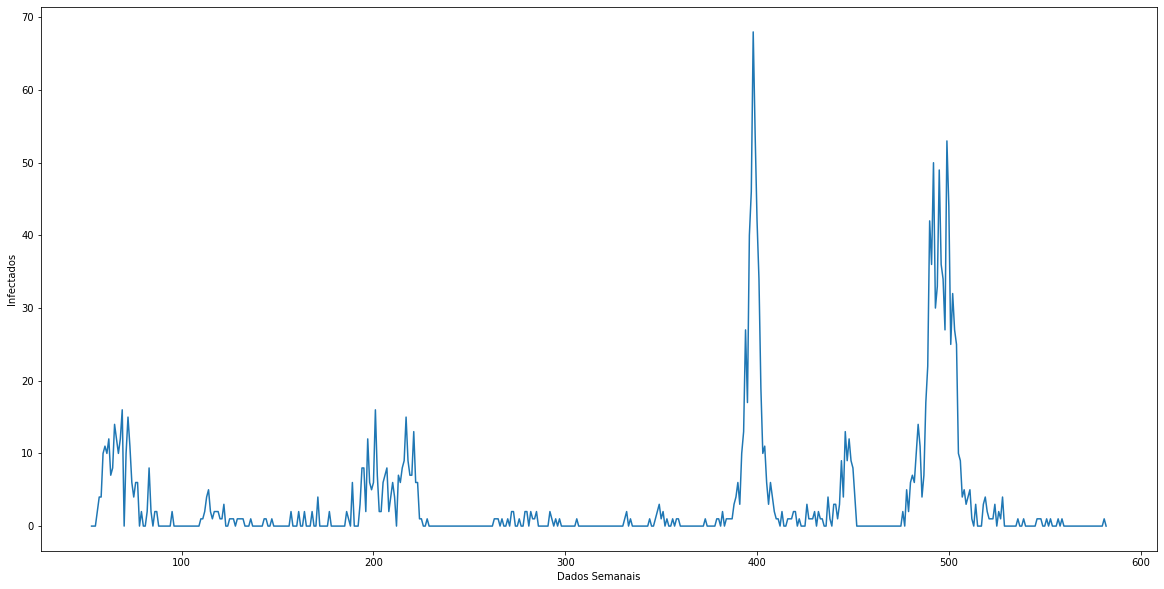

In [111]:
# Analisar dados de "Infectados" ao longo do tempo
plt.figure(figsize=(20,10))
plt.xlabel('Dados Semanais')
plt.ylabel('Infectados')
plt.plot(y_train['Infectados'])
plt.show()

# Examinando os atributos
Vamos examinar alguns atributos ao longo do tempo

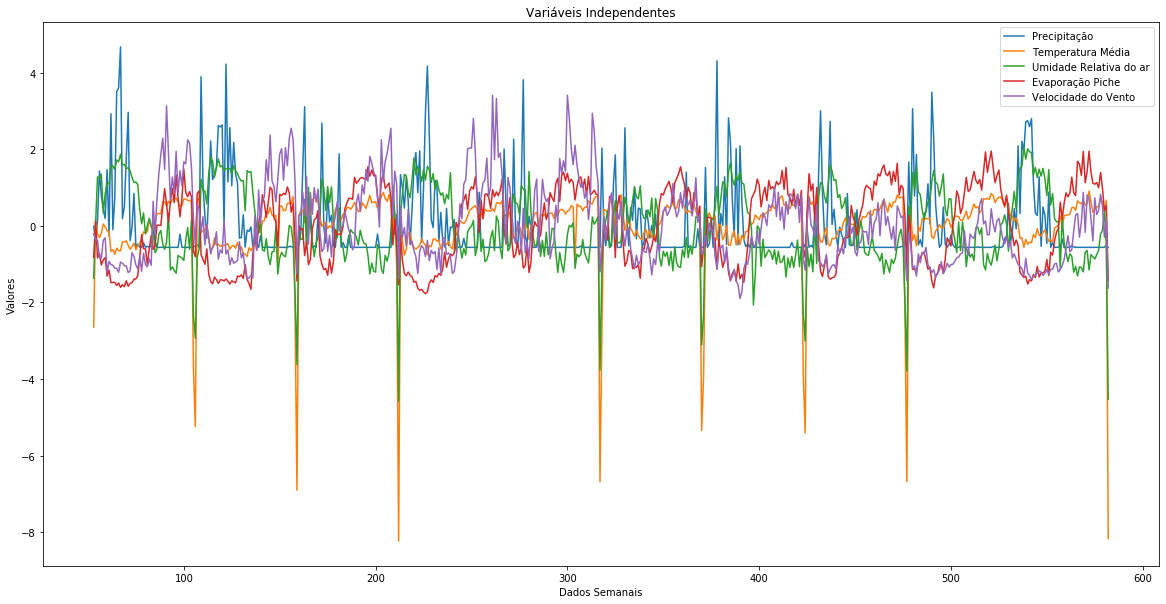

In [112]:

plt.figure(figsize=(20,10))
X_train.Precipitacao.plot(label="Precipitação")
X_train.TempMedia.plot( label="Temperatura Média")
X_train.Umidade.plot( label="Umidade Relativa do ar")
X_train.Evaporacao.plot( label="Evaporação Piche")
X_train.VelVento.plot( label="Velocidade do Vento")
plt.title("Variáveis Independentes")
plt.legend()
plt.xlabel('Dados Semanais')
plt.ylabel('Valores')

plt.show()

Text(0.5, 0, 'Time')

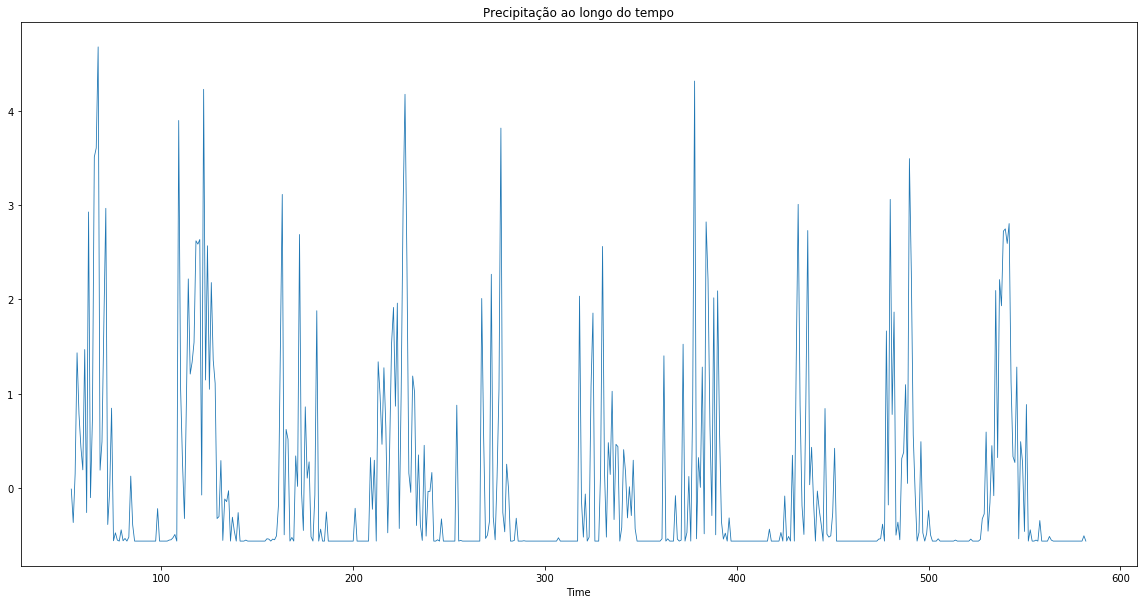

In [113]:
plt.figure(figsize=(20,10))
(X_train.Precipitacao.plot.line(lw=0.8))
plt.title('Precipitação ao longo do tempo')
plt.xlabel('Time')


Text(0.5, 0, 'Time')

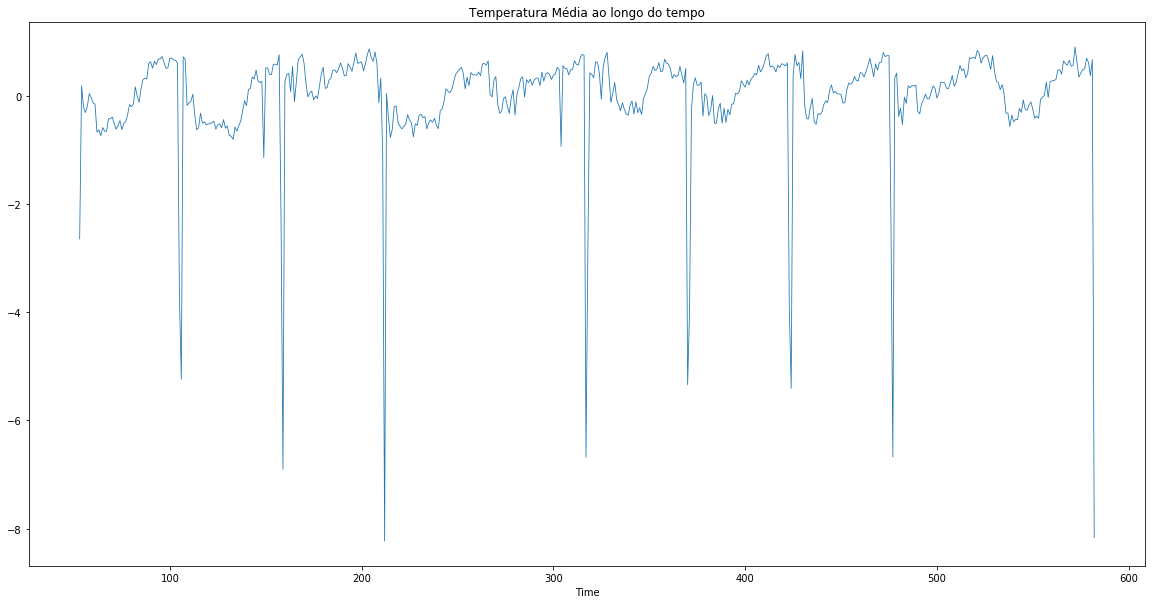

In [114]:
plt.figure(figsize=(20,10))
(X_train.TempMedia.plot.line(lw=0.8))
plt.title('Temperatura Média ao longo do tempo')
plt.xlabel('Time')


Text(0.5, 0, 'Time')

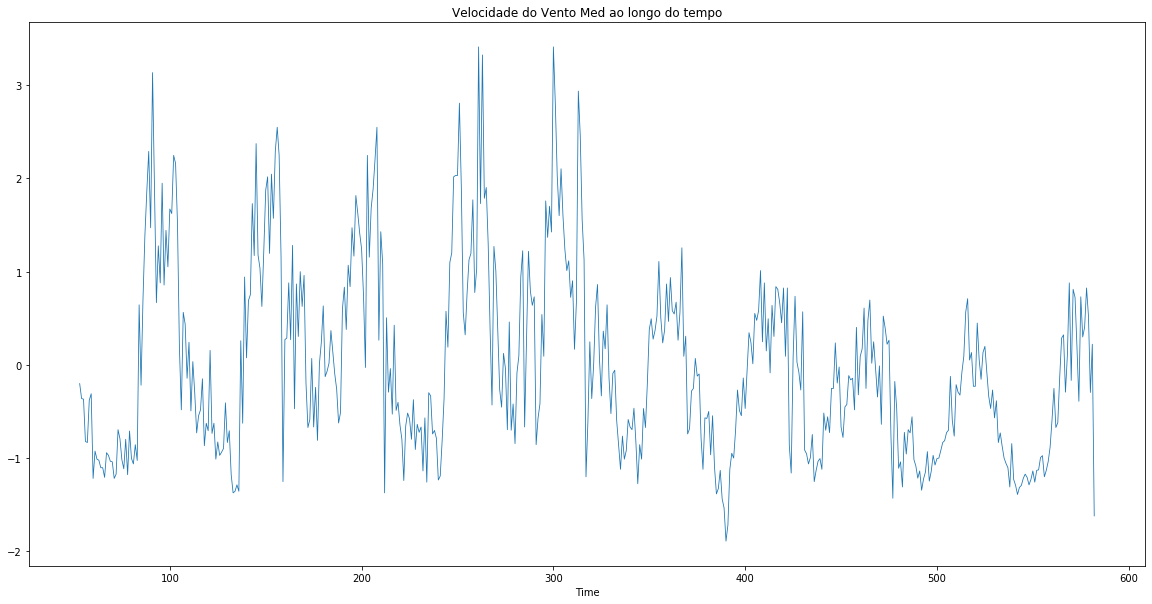

In [115]:
plt.figure(figsize=(20,10))
(X_train.VelVento.plot.line(lw=0.8))
plt.title('Velocidade do Vento Med ao longo do tempo')
plt.xlabel('Time')


Text(0.5, 0, 'Time')

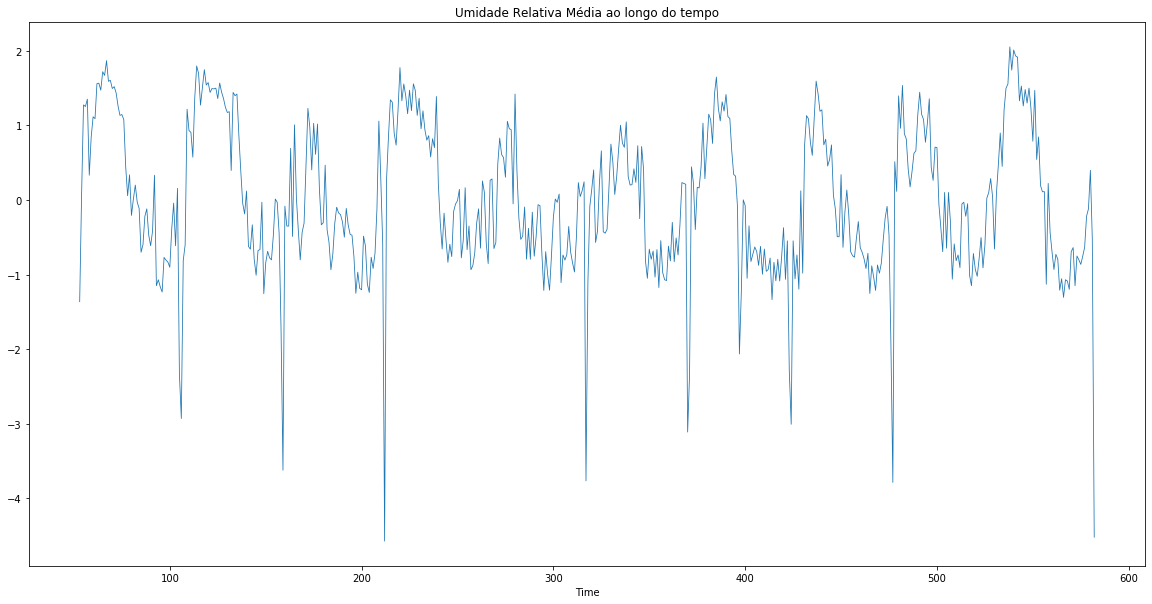

In [116]:
plt.figure(figsize=(20,10))
(X_train.Umidade.plot.line(lw=0.8))
plt.title('Umidade Relativa Média ao longo do tempo')
plt.xlabel('Time')


Nossa variável de destino, "Infectados" é um número inteiro não negativo, o que significa que estamos procurando fazer algumas previsões de contagem. As técnicas de regressão padrão para esse tipo de previsão incluem:
Regressão de Poisson
Regressão binomial negativa.

Qual técnica terá melhor desempenho depende de muitas coisas, mas a escolha entre a regressão de Poisson e a regressão binomial negativa é bastante direta.

A regressão de Poisson se ajusta de acordo com a suposição de que a média e a variância da distribuição da população são iguais. Quando não são, especificamente quando a variação é muito maior que a média, a abordagem binomial negativa é melhor.

A regressão binomial negativa simplesmente levanta a suposição de que a média e variância da população são iguais, permitindo uma classe maior de modelos possíveis. De fato, dessa perspectiva, a distribuição de Poisson é apenas um caso especial da distribuição binomial negativa.

In [85]:
print('Media e Variancia dos Infectados')
print('mean: ', y_train.mean()[2])
print('var :', y_train.var()[2])

Media e Variancia dos Infectados
mean:  3.3981132075471696
var : 71.12476013838857


Variancia maior que media sugere que a variável "Infectados" pode ser descrita por uma distribuição binomial negativa; portanto, usaremos uma regressão binomial negativa abaixo. 

Vamos analisar as Correlações


In [86]:
X_train

,Ano,Semana,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento
53,2008,1,-0.009070,-2.492251,-2.340608,-1.790755,-0.823799,-2.640295,-1.364821,-0.202704
54,2008,2,-0.363709,0.328338,0.177484,-0.064275,0.112212,0.193822,0.071062,-0.363796
55,2008,3,0.152449,-0.456960,0.600369,-1.869232,-0.836709,-0.205638,1.275884,-0.369549
56,2008,4,1.434065,-0.615461,0.440185,-1.412642,-0.714059,-0.303966,1.253878,-0.824058
57,2008,5,0.787990,-0.525404,0.555518,-0.891844,-1.017456,-0.187201,1.352905,-0.835565
...,...,...,...,...,...,...,...,...,...,...
578,2017,49,-0.560340,0.857874,0.305631,0.955918,1.396805,0.702878,-0.217765,0.824257
579,2017,50,-0.560340,0.717385,0.395334,0.213959,0.986897,0.626058,-0.118738,0.522210
580,2017,51,-0.560340,0.104996,0.670850,-1.954842,0.405925,0.377164,0.398400,-0.297633
581,2017,52,-0.504160,0.699374,0.805405,-0.363912,0.528575,0.674198,-0.525847,0.220162


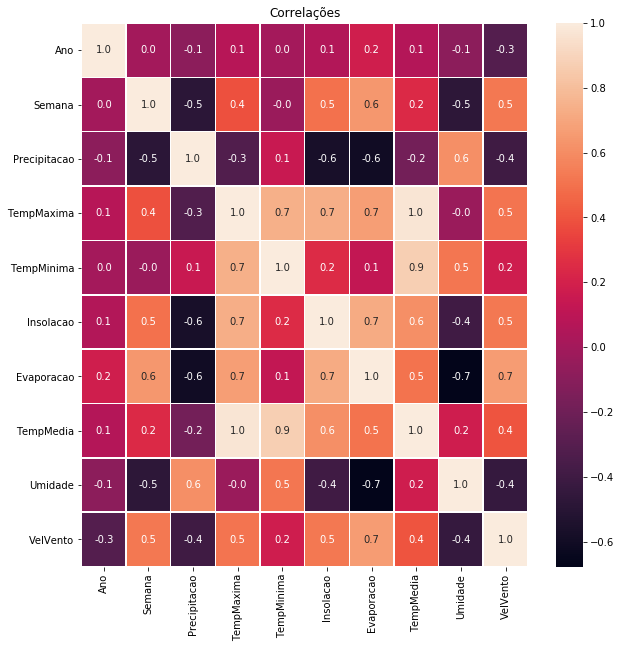

In [87]:
#X_train['Infectados'] = y_train['Infectados']

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlações')
plt.show()


In [88]:
#Verifica-se que TempMaxima está fortemente relacionada com Temp_Comp_Med e Umidade_Rel_Med, 
#sugerindo que podemos excluir aluguns desses atributos.

In [89]:
delete = ['TempMinima','TempMaxima']
for z in delete:
    del X_train[z]
    del X_test[z]

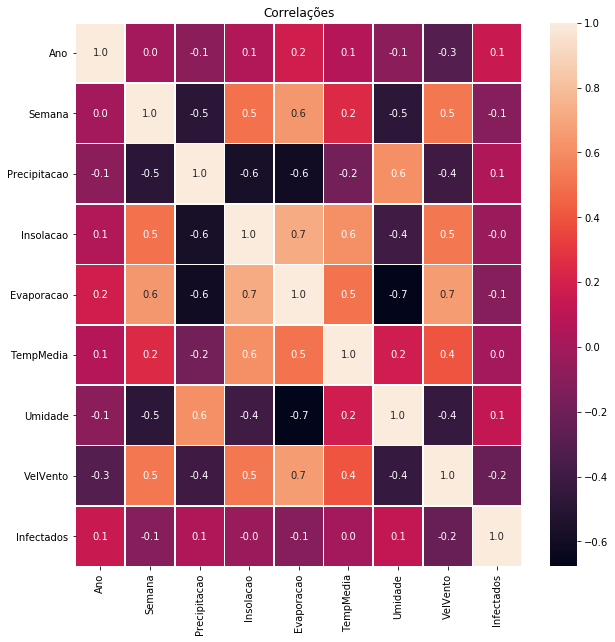

In [90]:
X_train['Infectados'] = y_train['Infectados']

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlações')
plt.show()

Text(0.5, 1.0, 'Correlações')

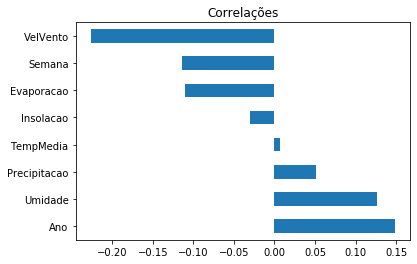

In [91]:
correlations = X_train.corr()
(correlations['Infectados'].drop('Infectados').sort_values(ascending=False).plot.barh())
plt.title('Correlações')

Portanto, temos algumas informações valiosas aqui. TempMaxima, Temp_CompMed e Umidade_Rel_Med são os atributos que estão mais fortemente correlacionados com o "Infectados".

Text(0, 0.5, 'Total de Infectados')

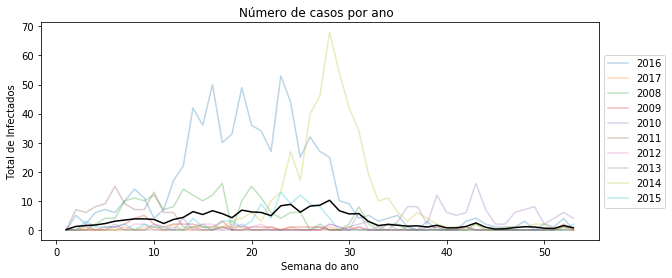

In [92]:
#Numero de Casos por semana
for i in set(y_train['Ano']):
    df = y_train[y_train['Ano'] == i]
    df.set_index('Semana', drop = True, inplace = True)
    plt.plot(df['Infectados'], alpha = .3)
    
y_train.groupby('Semana')['Infectados'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(y_train['Ano']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Número de casos por ano  ')
plt.xlabel('Semana do ano')
plt.ylabel('Total de Infectados')

# Construindo modelos de Machine Learning

Agora que temos uma compreensão mais clara do nosso conjunto de dados, continuaremos a construir nossos modelos de ML.


In [93]:
features=['Infectados','Precipitacao','Insolacao','Evaporacao','TempMedia','Umidade','VelVento'] 

X_train=X_train.join(X_train.groupby(['Semana'])['Infectados'].mean(), on=['Semana'], rsuffix='_avg')
X_test=X_test.join(X_train.groupby(['Semana'])['Infectados'].mean(), on=['Semana'], rsuffix='_avg')

#TRAIN
X= X_train[features]
Y = X_train['Infectados']

#TEST
Xt= X_test[features]
X.fillna(method='bfill', inplace=True)
Xt.fillna(method='bfill', inplace=True)


## Criação dos Modelos

In [94]:
#SVM - Support Vetor Machine / SRV - Support vetor Regression
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
t0 = time.time()
svr.fit(X,Y)

svr_fit = time.time() - t0
print("Complexidade SVR e largura de banda selecionadas e modelo ajustado em %.3f s"
      % svr_fit)
model=svr.best_estimator_
print(model)

Complexidade SVR e largura de banda selecionadas e modelo ajustado em 2.015 s
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [95]:
#KNN 
#k_range = list(range(1, 50))

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X,Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [96]:
# ----------------
# LogisticRegression
# ----------------
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Criação de predições a partir dos dados de treino (70%) - Para TREINO e 30% Para VALIDAÇÃO

In [97]:
train_subtrain = X_train.sample(frac=0.7)
train_subtest = X_train.loc[~X_train.index.isin(train_subtrain.index)]

train_subtrain.fillna(method='bfill', inplace=True)
train_subtest.fillna(method='bfill', inplace=True)

#X_train.describe()
train_subtest.describe()
print(train_subtest)

      Ano  Semana  Precipitacao  Insolacao  Evaporacao  TempMedia   Umidade  \
53   2008       1     -0.009070  -1.790755   -0.823799  -2.640295 -1.364821   
58   2008       6      0.436862   0.863173   -0.885123   0.048378  0.332382   
59   2008       7      0.194584  -0.613610   -0.827026  -0.026393  0.844019   
64   2008      12      0.721276  -0.406718   -1.475778  -0.736203  1.473937   
67   2008      15      4.674974  -1.348434   -1.604883  -0.653238  1.870043   
..    ...     ...           ...        ...         ...        ...       ...   
567  2017      38     -0.560340   1.169944    1.609828   0.599428 -1.070492   
568  2017      39     -0.560340   1.269823    1.319342   0.574846 -1.086997   
569  2017      40     -0.560340   1.590863    1.945501   0.666004 -1.199777   
570  2017      41     -0.560340   0.727623    1.128912   0.550263 -0.693642   
572  2017      43     -0.560340   1.348299    1.951956   0.910802 -1.150264   

     VelVento  Infectados  Infectados_avg  
53  -0.

In [98]:
#create preds
preds= model.predict(train_subtest[features]).astype(int)
#SVM
#add to the dataframes
train_subtest['fitted'] = preds

# KNN
preds2 = knn.predict(train_subtest[features]).astype(int)
train_subtest['fitted2'] = preds2
#train_subtest.index = train_subtest['week_start_date']

# Logistic regression
preds3 = logreg.predict(train_subtest[features]).astype(int)
train_subtest['fitted3'] = preds3
#train_subtest.index = train_subtest['week_start_date']


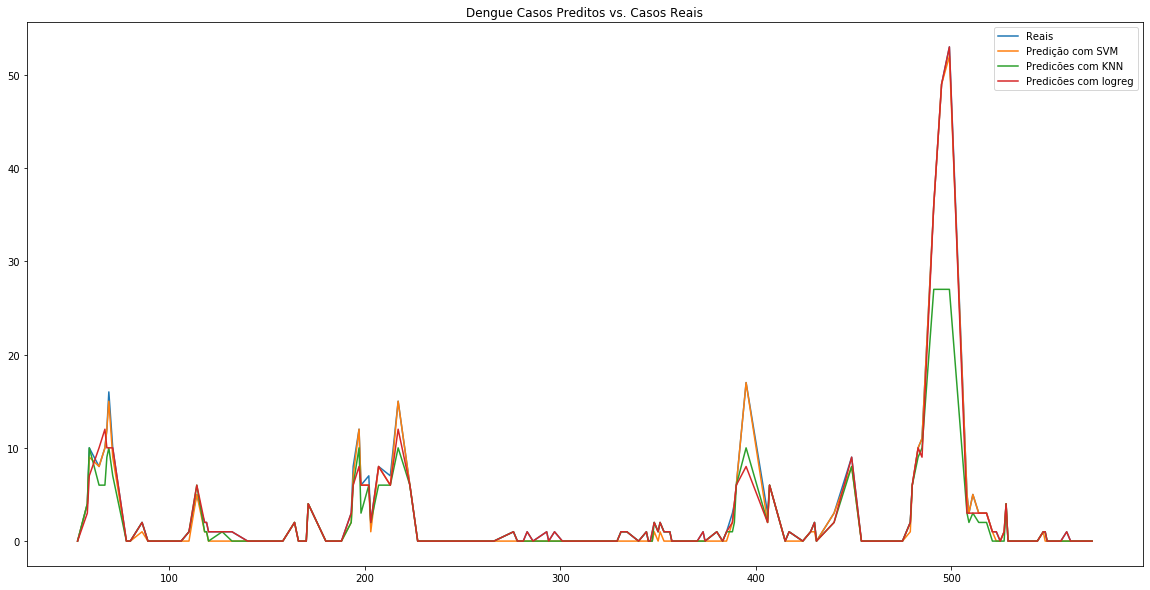

In [107]:
## Plotagem com parte de dados de treino (70%)
plt.figure(figsize=(20,10))
train_subtest.Infectados.plot(label="Reais")
train_subtest.fitted.plot( label="Predição com SVM")
train_subtest.fitted2.plot( label="Predicões com KNN")
train_subtest.fitted3.plot( label="Predicões com logreg")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()


In [100]:
scores = cross_val_score(svr, X,Y, cv=5, scoring = "r2")
print("Scores usando SVR:", scores)
print("Média  usando SVR:", scores.mean())

Scores usando SVR: [0.99900671 0.99901403 0.98994725 0.84526185 0.9967729 ]
Média  usando SVR: 0.9660005492076408


In [101]:

scores = cross_val_score(knn, X,Y, cv=5, scoring = "r2")
print("Scores usando KNN:", scores)
print("Média  usando KNN:", scores.mean())

Scores usando KNN: [0.50493553 0.40040101 0.72361035 0.5997807  0.5090288 ]
Média  usando KNN: 0.5475512798410362


In [102]:
scores = cross_val_score(logreg, X,Y, cv=5, scoring = "r2")
print("Scores usando Reg. Logística:", scores)
print("Média usando Reg. Logística:", scores.mean())

Scores usando Reg. Logística: [0.91680837 0.89752342 0.91335404 0.89395355 0.86760724]
Média usando Reg. Logística: 0.8978493237565447


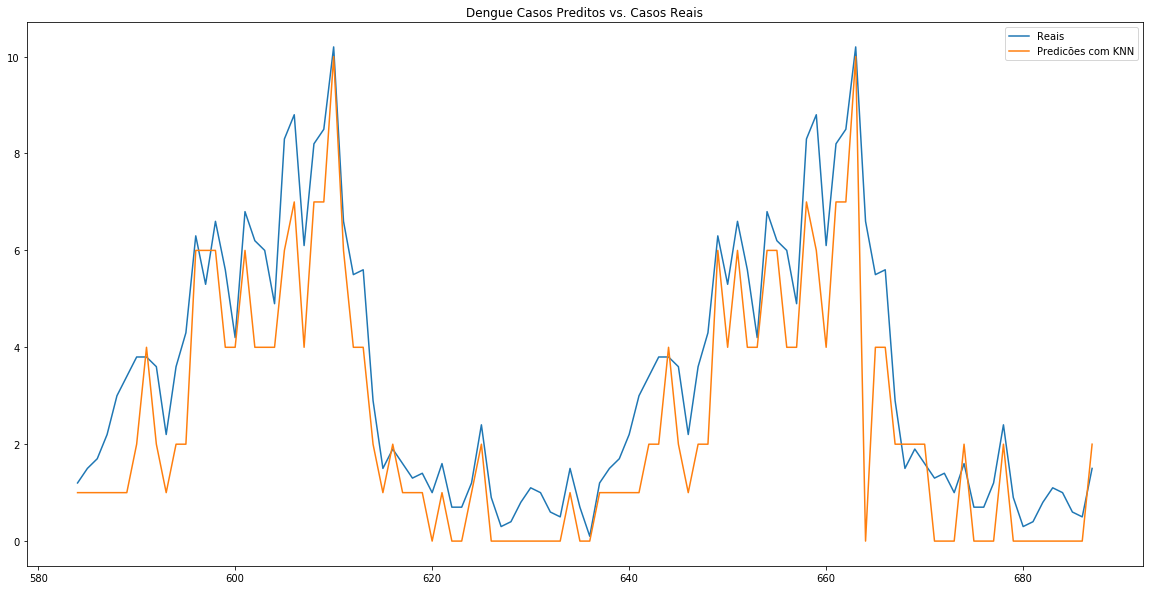

In [108]:
#Predição KNN

knn.fit(X,Y)
predictions = knn.predict(Xt).astype(int)
submission.Infectados = np.concatenate([predictions])

plt.figure(figsize=(20,10))
X_test.Infectados.plot(label="Reais")

submission.Infectados.plot( label="Predicões com KNN")

plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()

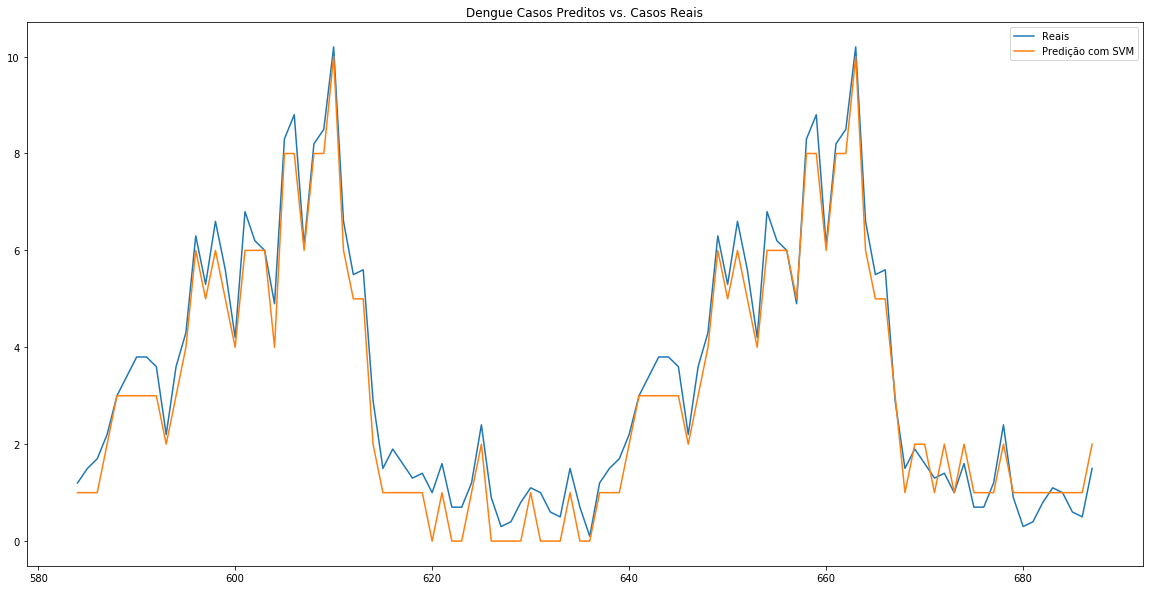

In [109]:
#Predição SVM

model.fit(X,Y)
predictions2 = model.predict(Xt).astype(int)

submission.Infectados = np.concatenate([predictions2])

plt.figure(figsize=(20,10))
X_test.Infectados.plot(label="Reais")
submission.Infectados.plot( label="Predição com SVM")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()

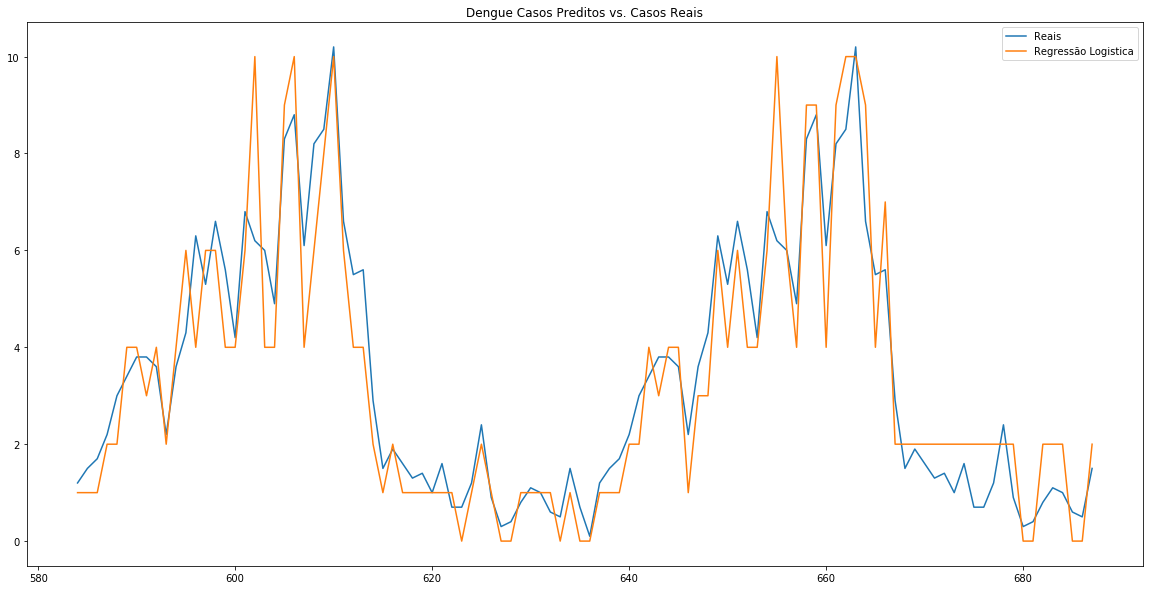

In [110]:
#Predição Logist Regression
logreg.fit(X,Y)
predictions3 = logreg.predict(Xt).astype(int)

submission.Infectados = np.concatenate([predictions3])


plt.figure(figsize=(20,10))
X_test.Infectados.plot(label="Reais")

submission.Infectados.plot( label="Regressão Logistica")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()